---
## Necessary Libraries
---

In [ ]:
#Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from google.colab import drive
from google.colab import files
import pandas as pd
import io
from sklearn.decomposition import PCA
from sklearn import tree

In [ ]:
#for the purpose of Display table of the features
pd.set_option('display.max_columns', None)
pd.set_option('display.colheader_justify', 'center') # Draw the Table in Center format

#a commoon print function for the results
def printSection(partNo = None, text = None, maxSize = 60):

    print('\n')
    if (partNo != None):
        print(maxSize * "#")
        numberOfSpaces = int((maxSize - len(partNo)) / 2) - 1
        print('#' + numberOfSpaces * " " + partNo + numberOfSpaces * " ")
        if(text!= None):
            # print('#')
            numberOfSpaces = int((maxSize - len(text))/2) - 1
            print('#' + numberOfSpaces * " " + text + numberOfSpaces * " " )
            print(maxSize * "#")

    else:
        print("============================")

    print('\n')


################################################
#               Column Analysis
################################################
printSection(partNo = "Testing Cosmetic Print", text = "Function Works Successfully!", maxSize = 60)




############################################################
#                  Testing Cosmetic Print                  
#               Function Works Successfully!               
############################################################




In [ ]:
class ModelTrainer():
  @staticmethod
  # This method trains a Linear Regression model using the provided training data and returns the trained model.
  def train_LinearRegression(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

  @staticmethod
  def train_KNN( X_train, Y_train, N = 5, weights='uniform'):
    '''
    This method trains a KNN model.

    Parameters:
    @X_train: The training set features - ND Array
    @Y_train: The training set labels - ND Array
    @N: Number of Neighbors - Int

    Return:
    @knn: Trained Model
    '''
    knn = KNeighborsClassifier(n_neighbors=N, weights = weights)
    knn.fit(X_train, Y_train)
    return knn


  @staticmethod
  def train_LogisticRegression(X_train, Y_train, max_iterations=100):
    '''
    This method trains a Logistic Regression model.

    Parameters:
    @X_train: The training set features - ND Array
    @Y_train: The training set labels - ND Array
    @max_iterations: Maximum Number of Iterations - Int

    Return:
    @clf: Trained Model
    '''
    clf = LogisticRegression(random_state=0, max_iter = max_iterations).fit(X_train, Y_train) # Initialize and train the Logistic Regression model with the specified maximum number of iterations
    return clf


  @staticmethod
  def train_RandomForestClassifier(X_train, Y_train, n_estimators = 100, max_depth = None):
    '''
    This method trains a Random Forest Classifier.

    Parameters:
    @X_train: The training set features - ND Array
    @Y_train: The training set labels - ND Array
    @n_estimators: Number of Iterations - Int
    @max_depth: Maximum Depth - Int

    Return:
    @clf: Trained Model
    '''
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators = n_estimators).fit(X_train, Y_train) # Initialize and train the Random Forest model with the specified number of trees and maximum tree depth
    return clf

  @staticmethod
  def train_KMeans(X_train, numberOfClusters = 2, randomState = 0):
    '''
    This method trains a KMeans Classifier.

    Parameters:
    @X_train: The training set features - ND Array
    @numberOfClusters: Number of Clusters - Int
    @randomState:  Int

    Return:
    @clf: Trained Model
    '''
    clf = KMeans(n_clusters=numberOfClusters, random_state=randomState).fit(X_train) # Initialize and train the K-Means model with the specified number of clusters
    return clf

  @staticmethod
  # This method trains a Polynomial Regression model using the provided training data and returns the trained model.
  def train_PolynomialRegression(X_train, Y_train, nb_degree):
    '''
    This method trains a Polynomial Regression.

    Parameters:
    @X_train: The training set features - ND Array
    @Y_train: The training set labels - ND Array
    @nb_degree:  Degree of Polynomial - Int

    Return:
    @model: Trained Model
    '''
    polynomial_features = PolynomialFeatures(degree = nb_degree) # Initialize the Polynomial Features transformer with the specified degree
    X_TRANSF = polynomial_features.fit_transform(X_train) # Transform the input data into polynomial features
    model = LinearRegression().fit(X_TRANSF, Y_train) # Train a Linear Regression model on the transformed data
    return model

  @staticmethod
  def train_DecisionTree(X_train, Y_train):
    '''
    This method trains a Decision Tree.

    Parameters:
    @X_train: The training set features - ND Array
    @Y_train: The training set labels - ND Array

    Return:
    @model: Trained Model
    '''
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    return model

  @staticmethod
   # This method calculates and prints the accuracy of the provided model on the provided test data.
  def score(model, X_test, Y_test, sampleText = ""):
    '''
    This method calculates the accuracy of the model

    Parameters:
    @model: The target model we want to check the accuracy.
    @X_test: The test set features - ND Array
    @Y_test: The test set labels - ND Array
    @sampleText: The text you weant to be printed at the end (generally name of the model)

    Return:
    None
    '''
    score = model.score(X_test, Y_test)
    print(f"({sampleText}) Model Accuracy: {score} ")
    return score

  @staticmethod
  # This method splits the provided data into a training set and a test set.
  def split(X,Y, testSize = 0.2, shuffle = False):
    '''
    This method splits the data into training set and test set

    Parameters:
    @X: The Features array - ND Array
    @Y: The Labels array - ND Array
    @testSize: The test size we want our data to be splitted into - Float
    @shuffle: Should the data be shuffled - Boolean

    Returns:
    X_train, X_test, y_train, y_test
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testSize, random_state=42, shuffle = shuffle)
    return X_train, X_test, y_train, y_test

  @staticmethod
  # This method analyzes a Polynomial Regression model by plotting its predictions on the provided test data.
  def polynomialModelAnalysis(model, X_test, Y_test, nb_degree = 1, modelName = ""):
    '''
    Analyzes a polynomial Model

    Parameters:
    @model: Target model we want to analyze
    @X_test: The test set features - ND Array
    @Y_test: The test set labels - ND Array
    @nb_degree:  Degree of Polynomial - Int
    @modelName: The text we want to be printed on the plots

    Return:
    @model: Trained Model
    '''


    polynomial_features = PolynomialFeatures(degree = nb_degree) # Initialize the Polynomial Features transformer with the specified degree
    X_NEW_TRANSF = polynomial_features.fit_transform(X_test) # Transform the input data into polynomial features
    Y_NEW = model.predict(X_NEW_TRANSF) # Train a Linear Regression model on the transformed data

    plt.plot(X_NEW_TRANSF, Y_NEW, color='coral', linewidth=3)

    plt.grid()
    plt.ylim(0,10)

    title = f'{modelName} - Degree = {nb_degree}'

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

  @staticmethod
  def modelAnalysis(model, X_test, Y_test, modelName = "", classificationModel = True):

    '''
    Analyzes a Classification Model

    Parameters:
    @model: Target model we want to analyze
    @X_test: The test set features - ND Array
    @Y_test: The test set labels - ND Array
    @nb_degree:  Degree of Polynomial - Int
    @classificationModel: The text we want to be printed on the plots

    Return:
    None. Plots ACC, ROC, Confusion Matrix
    '''

    # Print ACC
    ModelTrainer.score(model, X_test, Y_test, sampleText = modelName )

    if(classificationModel == True):


      # Draw Confusion Matrix
      y_pred_cm = model.predict(X_test)
      cm = confusion_matrix(Y_test, y_pred_cm, labels=model.classes_)
      disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
      disp.plot()
      plt.title(f"{modelName}: Confusion Matrix")
      plt.show()

      print("\n\n")

      # #find the F1 Score
      print('F1 score:',f1_score(Y_test, y_pred_cm))
      print("\n\n")

      # Draw ROC Curve
      y_pred_proba = model.predict_proba(X_test)[::,1]
      fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
      score = roc_auc_score(Y_test, y_pred_proba)

      plt.plot(fpr,tpr)
      plt.title(f"{modelName}: ROC Curve - AUC: {score:.4f}")
      plt.ylabel('True Positive Rate')
      plt.xlabel('False Positive Rate')


      plt.show()


  @staticmethod
  def checkForNan(dataFrame, columnName):
    '''
    Analyzes the mentioned column of a dataframe by drawing the data distribution plot and if the column contains any Null values.

    Parameters:
    @dataFrame: Target model we want to analyze
    @columnName: The test set features - ND Array


    Return:
    None. Plots ACC, ROC, Confusion Matrix
    '''
    print(f"Contains NaN/Null? {dataFrame[columnName].isnull().values.any()}")
    return np.where(pd.isnull(dataFrame[columnName]))

  @staticmethod
  def columnAnalysis(dataFrame, columnName, title = ""):

    ModelTrainer.checkForNan(dataFrame, columnName)
    printSection()

    print(dataFrame[columnName].value_counts())
    printSection()

    interval = 3 # units of seconds
    c = pd.Series(Counter(dataFrame[columnName]))
    c.plot(kind='bar', title=title)
    plt.show()
    plt.pause(interval)


  @staticmethod
  def feature_label_extractor(df, labelColumnName = None, columnIndex = None):
    '''
    Extracts the X and Y from the dataframe.

    Parameters:
    @df: Target dataframe we want to analyze
    @labelColumnName: The test set features - ND Array


    Return:
    features, labels
    '''
    if (columnIndex == None):
      features = df.loc[:, df.columns != labelColumnName]
      labels = df[labelColumnName]
    else:
      features = df.iloc[:, 0:columnIndex]
      labels = df[columnIndex]

    return features, labels

  @staticmethod
  def normalize(dataFrame):
    '''
    Extracts the X and Y from the dataframe.

    Parameters:
    @dataFrame: The dataframe we want to normalize

    Return:
    numpy array of normalized dataframe
    '''

    x = dataFrame.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    dataFrame = pd.DataFrame(x_scaled)
    return dataFrame

  @staticmethod
  def upsample(X,Y):
    '''
    Upsamples the imbalanced dataset

    Parameters:
    @X: The features
    @Y: The labels

    Return:
    numpy array of X_su, y_su
    '''
    su = SMOTE(random_state=42)
    X_su, y_su = su.fit_resample(X, Y)
    return X_su, y_su

  @staticmethod
  def mountDrive():
    '''
    mounts the google drive
    '''
    drive.mount('/content/drive')

  @staticmethod
  def readCSV(path):
    '''
    reads a CSV File and returns a Dataframe
    '''
    df = pd.read_csv(path)
    return df

  @staticmethod
  def uploadFile(fileOriginalName):
    '''
    Opens an Upload Button to upload a file to the google drive
    '''
    up = files.upload()
    df = pd.read_csv(io.BytesIO(up[fileOriginalName]))
    return df

  @staticmethod
  def dropColumn(dataframe, columnName):
    '''
    Drops a column with the mentioned name
    '''
    dataframe = dataframe.drop(labels= columnName, axis=1)
    return dataframe

  @staticmethod
  def removeColumnNames(dataframe):
    '''
    Removed the columns headers of the data frame.
    '''
    dataframe.columns = range(dataframe.shape[1])
    return dataframe

  @staticmethod
  def dataFrameAnalyze(dataFrame):
    '''
    Analyzing the data-frame. Checking if there are any null values or not.
    '''
    hasNull = dataFrame.isnull().values.any()
    nanLocations = None
    print(f"Has Null/Empty Values? {hasNull}")
    if(hasNull):
      print(f"Total Number of Null Values: {df.isnull().sum().sum()}")
      nanLocations = np.where(pd.isnull(dataFrame))
    return  nanLocations

  @staticmethod
  def PCA( X, number_of_components = None):
    '''
    Applies the PCA algorithm on the given feature array with the requested number of components.
    '''
    pca = PCA(n_components=number_of_components)
    X_PCA = pca.fit_transform(X)
    return X_PCA

  @staticmethod
  def findMaxBasedOn(dic, keyWord):
    '''
    Finds the maximum value in the "dic" array based on the passed key "keyWord".
    '''
    max = -1
    selectedItem = None
    for item in dic:
      if(item[keyWord] >= max):
        selectedItem = item
        max = item[keyWord]
    return selectedItem

  @staticmethod
  def ROC_Score(model, X_test, Y_test):
    '''
    Calculated the AUC (Area Under The Curve) of ROC.
    '''
    predicted = model.predict(X_test)
    return roc_auc_score(Y_test, predicted)

---
## Implenting the Algorithm
---

### Load The Data

In [ ]:
ModelTrainer.mountDrive()
try:
  dataPath = "/content/adss_data.csv"
  df = ModelTrainer.readCSV(dataPath)
except:
  df = ModelTrainer.uploadFile("adss_data.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SUBJECT_ID,50971,50971.1,50971.2,51221,51221.1,51221.2,51222,51222.1,51222.2,51248,51248.1,51248.2,51249,51249.1,51249.2,51250,51250.1,51250.2,51265,51265.1,51265.2,51277,51277.1,51277.2,51279,51279.1,51279.2,51301,51301.1,51301.2,Insulin,Mycophenolate Mofetil,Heparin,Fluconazole,Morphine Sulfate,Furosemide,Pantoprazole,Tacrolimus,Sulfameth/Trimethoprim SS,Potassium Chloride,D5 1/2NS,Propofol,Vial,Sodium Chloride 0.9% Flush,Docusate Sodium,Magnesium Sulfate,NS,D5W,Iso-Osmotic Dextrose,Insulin Human Regular,EXPIRE_FLAG
0,10126,2.8,4.15,8.8,14.9,31.80,53.3,5.3,11.30,18.2,28.0,29.80,35.5,32.4,34.8,37.3,80.0,85.0,103.0,20.0,66.0,155.0,15.3,18.10,27.2,1.74,3.75,6.17,2.1,8.60,19.2,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1
1,10220,2.9,3.80,5.1,26.8,30.95,43.2,9.4,10.50,14.9,27.7,28.65,30.0,31.3,33.8,35.3,82.0,85.0,89.0,69.0,120.0,221.0,13.8,14.80,16.1,3.16,3.62,5.19,5.7,15.00,31.1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1
2,10414,3.7,4.00,4.9,24.7,29.25,36.7,9.2,10.75,12.6,31.0,32.10,36.6,34.4,35.9,37.8,86.0,88.0,101.0,40.0,79.0,128.0,14.6,16.85,17.7,2.83,3.24,4.06,5.6,9.35,16.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0
3,1042,3.8,4.55,5.1,24.4,30.00,33.9,8.5,10.50,12.3,29.9,31.20,33.6,32.8,35.0,36.8,85.0,88.0,96.0,40.0,87.0,123.0,15.3,16.10,18.1,2.64,3.41,3.94,5.2,7.10,9.5,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
4,10434,3.5,4.40,6.2,23.2,30.30,37.4,7.8,10.30,13.0,28.5,30.10,32.1,32.0,33.9,36.5,85.0,89.0,94.0,45.0,176.0,488.0,14.5,15.65,17.4,2.62,3.42,4.28,5.2,12.80,29.2,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1


### Drop ID and Column Names

In [ ]:
df = ModelTrainer.dropColumn(df,"SUBJECT_ID")
df = ModelTrainer.removeColumnNames(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,2.8,4.15,8.8,14.9,31.80,53.3,5.3,11.30,18.2,28.0,29.80,35.5,32.4,34.8,37.3,80.0,85.0,103.0,20.0,66.0,155.0,15.3,18.10,27.2,1.74,3.75,6.17,2.1,8.60,19.2,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1
1,2.9,3.80,5.1,26.8,30.95,43.2,9.4,10.50,14.9,27.7,28.65,30.0,31.3,33.8,35.3,82.0,85.0,89.0,69.0,120.0,221.0,13.8,14.80,16.1,3.16,3.62,5.19,5.7,15.00,31.1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1
2,3.7,4.00,4.9,24.7,29.25,36.7,9.2,10.75,12.6,31.0,32.10,36.6,34.4,35.9,37.8,86.0,88.0,101.0,40.0,79.0,128.0,14.6,16.85,17.7,2.83,3.24,4.06,5.6,9.35,16.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0
3,3.8,4.55,5.1,24.4,30.00,33.9,8.5,10.50,12.3,29.9,31.20,33.6,32.8,35.0,36.8,85.0,88.0,96.0,40.0,87.0,123.0,15.3,16.10,18.1,2.64,3.41,3.94,5.2,7.10,9.5,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
4,3.5,4.40,6.2,23.2,30.30,37.4,7.8,10.30,13.0,28.5,30.10,32.1,32.0,33.9,36.5,85.0,89.0,94.0,45.0,176.0,488.0,14.5,15.65,17.4,2.62,3.42,4.28,5.2,12.80,29.2,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1


### Normalization

In [ ]:
df = ModelTrainer.normalize(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0.357143,0.451613,0.657895,0.401869,0.486395,0.958848,0.121951,0.543689,0.886364,0.777778,0.183673,0.515873,0.460674,0.458333,0.241071,0.776699,0.142857,0.513514,0.065728,0.109910,0.073293,0.317308,0.459459,0.756906,0.440506,0.664935,0.927114,0.204082,0.254005,0.244792,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.392857,0.225806,0.171053,0.772586,0.428571,0.543210,0.621951,0.388350,0.511364,0.769444,0.066327,0.079365,0.337079,0.319444,0.062500,0.796117,0.142857,0.135135,0.295775,0.304505,0.139558,0.173077,0.162162,0.143646,0.800000,0.597403,0.641399,0.571429,0.546911,0.451389,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.678571,0.354839,0.144737,0.707165,0.312925,0.275720,0.597561,0.436893,0.250000,0.861111,0.418367,0.603175,0.685393,0.611111,0.285714,0.834951,0.250000,0.459459,0.159624,0.156757,0.046185,0.250000,0.346847,0.232044,0.716456,0.400000,0.311953,0.561224,0.288330,0.199653,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.714286,0.709677,0.171053,0.697819,0.363946,0.160494,0.512195,0.388350,0.215909,0.830556,0.326531,0.365079,0.505618,0.486111,0.196429,0.825243,0.250000,0.324324,0.159624,0.185586,0.041165,0.317308,0.279279,0.254144,0.668354,0.488312,0.276968,0.520408,0.185355,0.076389,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.607143,0.612903,0.315789,0.660436,0.384354,0.304527,0.426829,0.349515,0.295455,0.791667,0.214286,0.246032,0.415730,0.333333,0.169643,0.825243,0.285714,0.270270,0.183099,0.506306,0.407631,0.240385,0.238739,0.215470,0.663291,0.493506,0.376093,0.520408,0.446224,0.418403,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


### Analyze Dataframe

In [ ]:
ModelTrainer.dataFrameAnalyze(df) #Checks if there is any NaN values

Has Null/Empty Values? False


In [ ]:
# Extrct X and Y from the Dataset
# EXPIRE FLAG
X,Y = ModelTrainer.feature_label_extractor(df, columnIndex=50)

### Data Splitting

In [ ]:
# Split the Train_set and Test_set
X_train, X_test, Y_train, Y_test = ModelTrainer.split(X,Y,testSize=0.20, shuffle=True)

### Train KNN

In [ ]:
# Train Model
model_KNN = ModelTrainer.train_KNN(X_train,Y_train, N = 20)

(KNN Model) Model Accuracy: 0.7777777777777778 


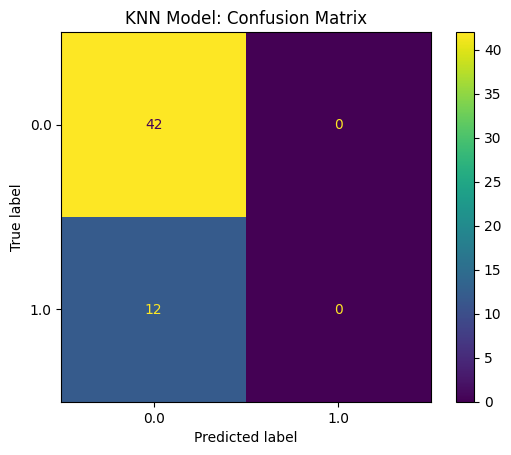




F1 score: 0.0





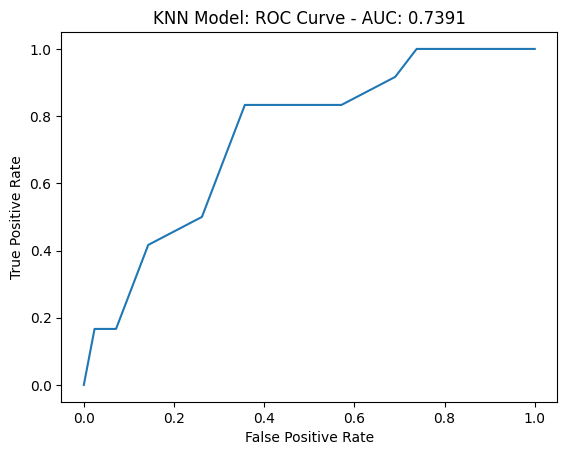

In [ ]:
# Analyze Model
ModelTrainer.modelAnalysis(model_KNN, X_test, Y_test, "KNN Model")

### Train Random Forest

In [ ]:
# Train Model
model_RandomForest = ModelTrainer.train_RandomForestClassifier(X_train,Y_train)

(Random Forest) Model Accuracy: 0.7777777777777778 


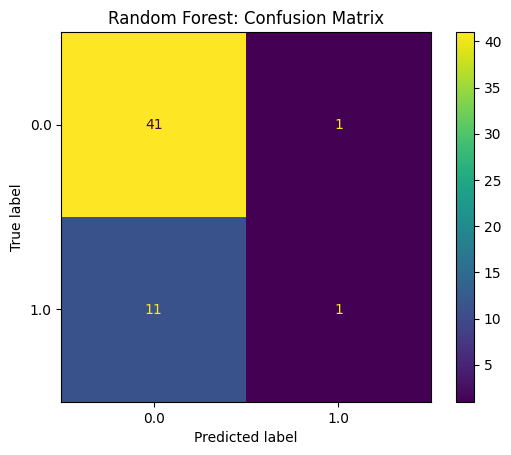




F1 score: 0.14285714285714285





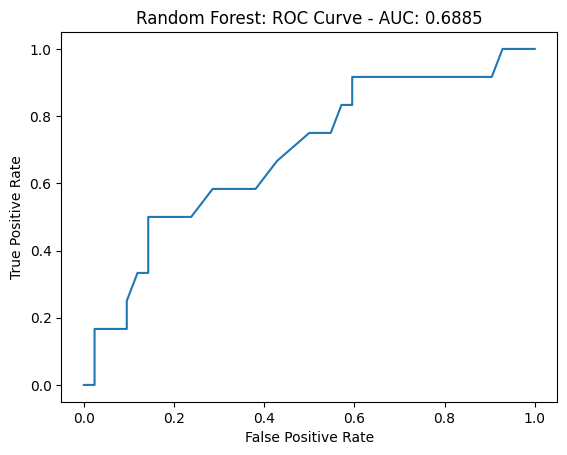

In [ ]:
# Analyze Model
ModelTrainer.modelAnalysis(model_RandomForest, X_test, Y_test, "Random Forest")

In [ ]:
### Train Logistic Regression

In [ ]:
# Train Model
model_LogisticRegression = ModelTrainer.train_LogisticRegression(X_train,Y_train)

(Logistic Regression) Model Accuracy: 0.7592592592592593 


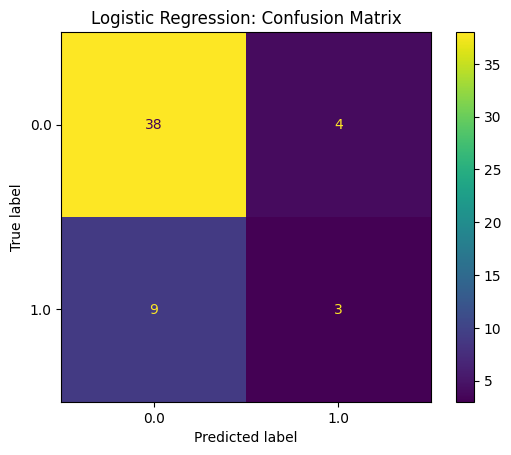




F1 score: 0.3157894736842105





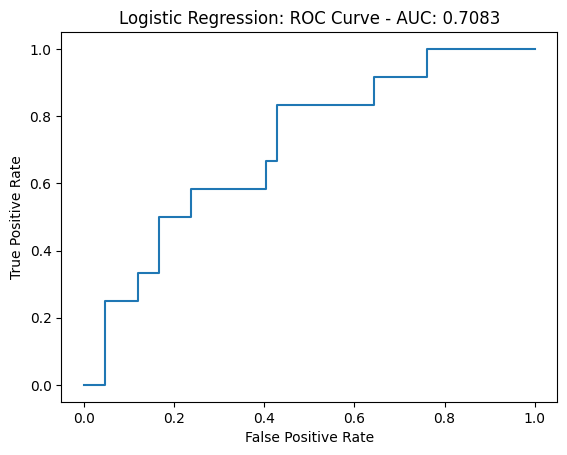

In [ ]:
# Analyze Model
ModelTrainer.modelAnalysis(model_LogisticRegression, X_test, Y_test, "Logistic Regression")

### Linear Regression

In [ ]:
# Train Model
model_linearRegression = ModelTrainer.train_LinearRegression(X_train,Y_train)

In [ ]:
# Analyze Model
ModelTrainer.modelAnalysis(model_LogisticRegression, X_test, Y_test, "Linear Regression", classificationModel=False)

(Linear Regression) Model Accuracy: 0.7592592592592593 


### Applying PCA

In [ ]:
################################################
#               Tuning Loop
################################################
# In this section, we are using a loop to tune the hyper parameters

log = []

increase_PCA_Components = 5
increase_KNN_Neighbors = 2
increase_LR_Max_iter = 20
increase_Random_forest_max_depth = 1
increase_Random_forest_estimator = 20



componenets = 5 # increase by 5

while componenets <= 51:

  # Apply PCA
  X_PCA = ModelTrainer.PCA(X, componenets)
  X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = ModelTrainer.split(X_PCA, Y, testSize=0.33, shuffle=True)


  ################################################
  #               KNN
  ################################################
  printSection(partNo = f"Components: {componenets}", text = "KNN", maxSize = 60)


  # Train KNN
  neighbors = 3 # increase by 2
  while neighbors < 100:

    # Train Model
    model_KNN_PCA = ModelTrainer.train_KNN(X_train_PCA, y_train_PCA, N = neighbors)

    # Analyze Model
    score_KNN = model_KNN_PCA.score(X_test_PCA,y_test_PCA)
    ROC_Score_KNN = ModelTrainer.ROC_Score(model_KNN_PCA, X_test_PCA,y_test_PCA)
    print(f"KNN | Neighbors: {neighbors} |  Score: {score_KNN}")
    log.append({"score": score_KNN , "Description" : f"KNN | Neighbors: {neighbors} |  Score: {score_KNN} | Componenets: {componenets}", "ROC_Score": ROC_Score_KNN})

    # Change Hyper-Paramter
    neighbors += increase_KNN_Neighbors


  ################################################
  #               Logistic Regression
  ################################################
  printSection(partNo = f"Components: {componenets}", text = "Logistic Regression", maxSize = 60)


  # Train Logistic Regression
  max_iter = 30 # Increase by 20

  while max_iter < 300:

    # Train Model
    model_LR_PCA = ModelTrainer.train_LogisticRegression(X_train_PCA, y_train_PCA, max_iterations = max_iter)

    # Analyze Model
    LR_PCA_Score = model_LR_PCA.score(X_test_PCA,y_test_PCA )
    ROC_Score_LR_PCA = ModelTrainer.ROC_Score(model_LR_PCA, X_test_PCA, y_test_PCA)
    print(f"Logistic Regression | max_iter: {max_iter}  | Score: {LR_PCA_Score}")
    log.append({"score": LR_PCA_Score , "Description" : f"Logistic Regression | max_iter: {max_iter}  | Score: {LR_PCA_Score} | Componenets: {componenets}", "ROC_Score": ROC_Score_LR_PCA})

    # Change Hyper-Paramter
    max_iter += increase_LR_Max_iter




  ################################################
  #               Train Random Forest
  ################################################
  printSection(partNo = f"Components: {componenets}", text = "Random Forest Classifier", maxSize = 60)


  # Train Random Forest

  n_estimators = 90 # increase by 20
  while n_estimators < 300:
    max_depth = 2 # increase by 1
    while max_depth < 30:

      # Train Model
      model_RF_PCA = ModelTrainer.train_RandomForestClassifier(X_train_PCA, y_train_PCA, n_estimators = n_estimators, max_depth = max_depth)

      # Analyze Model
      RF_PCA_Score = model_RF_PCA.score(X_test_PCA,y_test_PCA)
      ROC_Score_RF_PCA = ModelTrainer.ROC_Score(model_RF_PCA, X_test_PCA, y_test_PCA)
      print(f"Random Forest | n_estimator: {n_estimators} | Max_Depth: {max_depth} | Score: {RF_PCA_Score}")
      log.append({"score": RF_PCA_Score , "Description" : f"Random Forest | n_estimator: {n_estimators} | Max_Depth: {max_depth} | Score: {RF_PCA_Score} | Componenets: {componenets}", "ROC_Score": ROC_Score_RF_PCA})

      # Change Hyper-Paramter
      max_depth += increase_Random_forest_max_depth

    n_estimators += increase_Random_forest_estimator





  componenets += increase_PCA_Components



############################################################
#                      Components: 5                      
#                           KNN                           
############################################################


KNN | Neighbors: 3 |  Score: 0.6629213483146067
KNN | Neighbors: 5 |  Score: 0.6741573033707865
KNN | Neighbors: 7 |  Score: 0.6966292134831461
KNN | Neighbors: 9 |  Score: 0.7078651685393258
KNN | Neighbors: 11 |  Score: 0.7303370786516854
KNN | Neighbors: 13 |  Score: 0.7191011235955056
KNN | Neighbors: 15 |  Score: 0.7415730337078652
KNN | Neighbors: 17 |  Score: 0.7415730337078652
KNN | Neighbors: 19 |  Score: 0.7303370786516854
KNN | Neighbors: 21 |  Score: 0.7303370786516854
KNN | Neighbors: 23 |  Score: 0.7303370786516854
KNN | Neighbors: 25 |  Score: 0.7303370786516854
KNN | Neighbors: 27 |  Score: 0.7303370786516854
KNN | Neighbors: 29 |  Score: 0.7303370786516854
KNN | Neighbors: 31 |  Score: 0.7415730337078652
KNN | Neighbors: 33 |  Sc

In [ ]:
print(f"How Many Models Checked In Total: { (np.array(log).shape)[0] }")
print(f"Best Model Based on Accuracy Is: { ModelTrainer.findMaxBasedOn(log, 'score') }")
print(f"Best Model Based on Accuracy Is: { ModelTrainer.findMaxBasedOn(log, 'ROC_Score') }")

How Many Models Checked In Total: 3710
Best Model Based on Accuracy Is: {'score': 0.7865168539325843, 'Description': 'Random Forest | n_estimator: 90 | Max_Depth: 24 | Score: 0.7865168539325843 | Componenets: 20', 'ROC_Score': 0.5869565217391304}
Best Model Based on Accuracy Is: {'score': 0.7528089887640449, 'Description': 'KNN | Neighbors: 5 |  Score: 0.7528089887640449 | Componenets: 50', 'ROC_Score': 0.5925559947299078}


### Upsample the Imbalanced Data

In [ ]:
X_upsampled, Y_upsampled = ModelTrainer.upsample(X, Y)

In [ ]:

################################################
#               Tuning Loop
################################################
# In this section, we are using a loop to tune the hyper parameters
log_upsampled = []

increase_PCA_Components = 5
increase_KNN_Neighbors = 2
increase_LR_Max_iter = 20
increase_Random_forest_max_depth = 1
increase_Random_forest_estimator = 20



componenets = 5 # increase by 5

while componenets <= 51:

  # Apply PCA
  X_PCA = ModelTrainer.PCA(X_upsampled, componenets)
  X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = ModelTrainer.split(X_PCA, Y_upsampled, testSize=0.33, shuffle=True)


  ################################################
  #               KNN
  ################################################
  printSection(partNo = f"Components: {componenets}", text = "KNN", maxSize = 60)


  # Train KNN
  neighbors = 3 # increase by 2
  while neighbors < 100:

    # Train Model
    model_KNN_PCA = ModelTrainer.train_KNN(X_train_PCA, y_train_PCA, N = neighbors)

    # Analyze Model
    score_KNN = model_KNN_PCA.score(X_test_PCA,y_test_PCA)
    ROC_Score_KNN = ModelTrainer.ROC_Score(model_KNN_PCA, X_test_PCA,y_test_PCA)
    print(f"KNN | Neighbors: {neighbors} |  Score: {score_KNN}")
    log_upsampled.append({"score": score_KNN , "Description" : f"KNN | Neighbors: {neighbors} |  Score: {score_KNN} | Componenets: {componenets}", "ROC_Score": ROC_Score_KNN})

    # Change Hyper-Paramter
    neighbors += increase_KNN_Neighbors


  ################################################
  #               Logistic Regression
  ################################################
  printSection(partNo = f"Components: {componenets}", text = "Logistic Regression", maxSize = 60)


  # Train Logistic Regression
  max_iter = 30 # Increase by 20

  while max_iter < 300:

    # Train Model
    model_LR_PCA = ModelTrainer.train_LogisticRegression(X_train_PCA, y_train_PCA, max_iterations = max_iter)

    # Analyze Model
    LR_PCA_Score = model_LR_PCA.score(X_test_PCA,y_test_PCA )
    ROC_Score_LR_PCA = ModelTrainer.ROC_Score(model_LR_PCA, X_test_PCA, y_test_PCA)
    print(f"Logistic Regression | max_iter: {max_iter}  | Score: {LR_PCA_Score}")
    log_upsampled.append({"score": LR_PCA_Score , "Description" : f"Logistic Regression | max_iter: {max_iter}  | Score: {LR_PCA_Score} | Componenets: {componenets}", "ROC_Score": ROC_Score_LR_PCA})

    # Change Hyper-Paramter
    max_iter += increase_LR_Max_iter




  ################################################
  #               Random Forest Classifier
  ################################################
  printSection(partNo = f"Components: {componenets}", text = "Random Forest Classifier", maxSize = 60)


  # Train Random Forest

  n_estimators = 90 # increase by 20
  while n_estimators < 300:
    max_depth = 2 # increase by 1
    while max_depth < 30:

      # Train Model
      model_RF_PCA = ModelTrainer.train_RandomForestClassifier(X_train_PCA, y_train_PCA, n_estimators = n_estimators, max_depth = max_depth)

      # Analyze Model
      RF_PCA_Score = model_RF_PCA.score(X_test_PCA,y_test_PCA)
      ROC_Score_RF_PCA = ModelTrainer.ROC_Score(model_RF_PCA, X_test_PCA, y_test_PCA)
      print(f"Random Forest | n_estimator: {n_estimators} | Max_Depth: {max_depth} | Score: {RF_PCA_Score}")
      log_upsampled.append({"score": RF_PCA_Score , "Description" : f"Random Forest | n_estimator: {n_estimators} | Max_Depth: {max_depth} | Score: {RF_PCA_Score} | Componenets: {componenets}", "ROC_Score": ROC_Score_RF_PCA})

      # Change Hyper-Paramter
      max_depth += increase_Random_forest_max_depth

    n_estimators += increase_Random_forest_estimator


  ################################################
  #               Linear Regression
  ################################################
  printSection(partNo = f"Components: {componenets}", text = "Linear Regression", maxSize = 60)
  model_linearRegression = ModelTrainer.train_LinearRegression(X_train_PCA, y_train_PCA)
  LinearRegression_Score = ModelTrainer.score(model_linearRegression, X_test_PCA, y_test_PCA)
  print(f"Linear Regression |  Score: {LinearRegression_Score}")
  log_upsampled.append({"score": LinearRegression_Score , "Description" : f"Linear Regression | Score: {LinearRegression_Score} | Componenets: {componenets}", "ROC_Score": 0})



  componenets += increase_PCA_Components




############################################################
#                      Components: 5                      
#                           KNN                           
############################################################


KNN | Neighbors: 3 |  Score: 0.6992481203007519
KNN | Neighbors: 5 |  Score: 0.7142857142857143
KNN | Neighbors: 7 |  Score: 0.7142857142857143
KNN | Neighbors: 9 |  Score: 0.6766917293233082
KNN | Neighbors: 11 |  Score: 0.6842105263157895
KNN | Neighbors: 13 |  Score: 0.6616541353383458
KNN | Neighbors: 15 |  Score: 0.6616541353383458
KNN | Neighbors: 17 |  Score: 0.6616541353383458
KNN | Neighbors: 19 |  Score: 0.6766917293233082
KNN | Neighbors: 21 |  Score: 0.6917293233082706
KNN | Neighbors: 23 |  Score: 0.706766917293233
KNN | Neighbors: 25 |  Score: 0.6691729323308271
KNN | Neighbors: 27 |  Score: 0.6842105263157895
KNN | Neighbors: 29 |  Score: 0.6466165413533834
KNN | Neighbors: 31 |  Score: 0.6541353383458647
KNN | Neighbors: 33 |  Sco

---
## Results
---

### Train The Final Model Based On The Previous Output

We chose the model with the highest AUROC possible.

In [ ]:
print(f"How Many Models Checked In Total: { (np.array(log_upsampled).shape)[0] }")
print(f"Best Model Based on Accuracy Is: { ModelTrainer.findMaxBasedOn(log_upsampled, 'score') }")
print(f"Best Model Based on AUROC Is: { ModelTrainer.findMaxBasedOn(log_upsampled, 'ROC_Score') }")

How Many Models Checked In Total: 3720
Best Model Based on Accuracy Is: {'score': 0.8721804511278195, 'Description': 'Random Forest | n_estimator: 150 | Max_Depth: 20 | Score: 0.8721804511278195 | Componenets: 50', 'ROC_Score': 0.8731258518855066}
Best Model Based on AUROC Is: {'score': 0.8721804511278195, 'Description': 'Random Forest | n_estimator: 150 | Max_Depth: 20 | Score: 0.8721804511278195 | Componenets: 50', 'ROC_Score': 0.8731258518855066}


(Random Forest - Final) Model Accuracy: 0.8120300751879699 


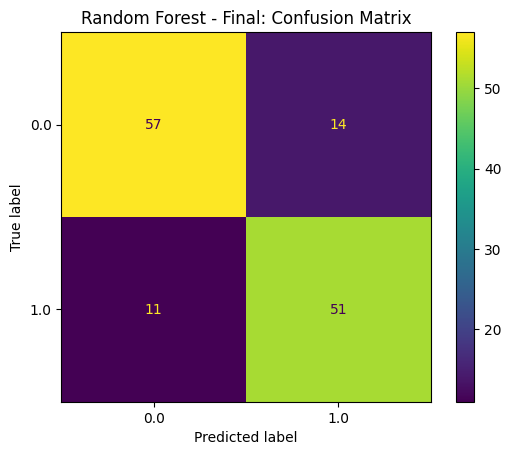




F1 score: 0.8031496062992126





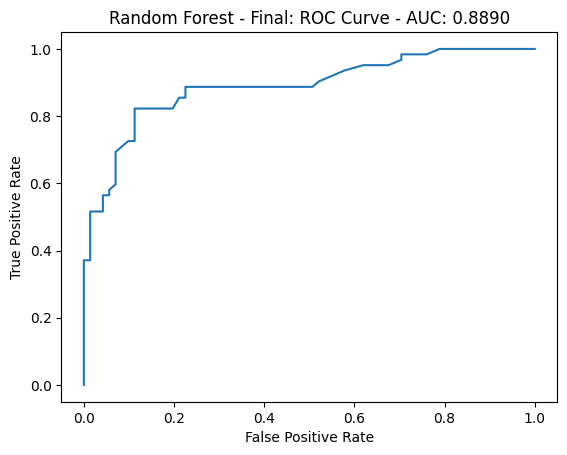

In [ ]:
# Upsample
X_upsampled, Y_upsampled = ModelTrainer.upsample(X, Y)

# Use PCA
X_PCA = ModelTrainer.PCA(X_upsampled, 45 )
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = ModelTrainer.split(X_PCA, Y_upsampled, testSize=0.33, shuffle=True)


# Train The Model
model_Final_Random_Forest = ModelTrainer.train_RandomForestClassifier(X_train_PCA, y_train_PCA, n_estimators =  150, max_depth = 20)

# Analyze The Model
ModelTrainer.modelAnalysis(model_Final_Random_Forest, X_test_PCA, y_test_PCA, "Random Forest - Final")

---
## References
---

- https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- https://data36.com/polynomial-regression-python-scikit-learn/

- https://data36.com/polynomial-regression-python-scikit-learn/

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- https://stackoverflow.com/questions/36688022/removing-header-column-from-pandas-dataframe

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/

- https://www.statology.org/plot-roc-curve-python/

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- https://datatofish.com/check-nan-pandas-dataframe/